In [1]:
import os, sys, getopt, pdb
import time
import math
import numpy as np
import pandas as pd
pd.set_option("max_rows", 100)
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
file=pd.read_csv('/Datasets/Protein_translocation_images/PT_1056.csv')

In [216]:
file['intr'].describe()

count    1056.000000
mean       44.333333
std        43.473549
min         0.000000
25%         1.000000
50%        38.500000
75%        86.000000
max       115.000000
Name: intr, dtype: float64

In [184]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

In [188]:
100/np.exp(3*normalization(file['intr'])).describe()

count      0.094697
mean      17.635396
std       18.472287
min      100.000000
25%       97.425037
50%       34.468648
75%       10.608886
max        4.978707
Name: intr, dtype: float64

In [76]:
req_total=pd.DataFrame(columns=('No.','num of request'))
req_total['No.']=range(1000)
req_total['num of request']=0
for i in range(1000):
    req=pd.read_csv('/Datasets/Protein_translocation_images/Requests_intr90/req_%d.csv'%i)
    req=req.loc[req['request']==1]
    for no in list(req['No.']):
        req_total.loc[req_total['No.']==no, 'num of request']+=1
req_total.loc[req_total['num of request']>0].sort_values('num of request',ascending=False)

,No.,num of request
262,262,897
816,816,896
197,197,895
527,527,891
293,293,888
...,...,...
882,882,838
182,182,836
374,374,835
361,361,834


In [77]:
file.loc[file['No.'].isin(list(req_total.loc[req_total['num of request']>0, 'No.'])), 'intr'].describe()

count    352.000000
mean      94.198864
std        9.988609
min       81.000000
25%       86.000000
50%       93.000000
75%       99.000000
max      115.000000
Name: intr, dtype: float64

# Num of transfer

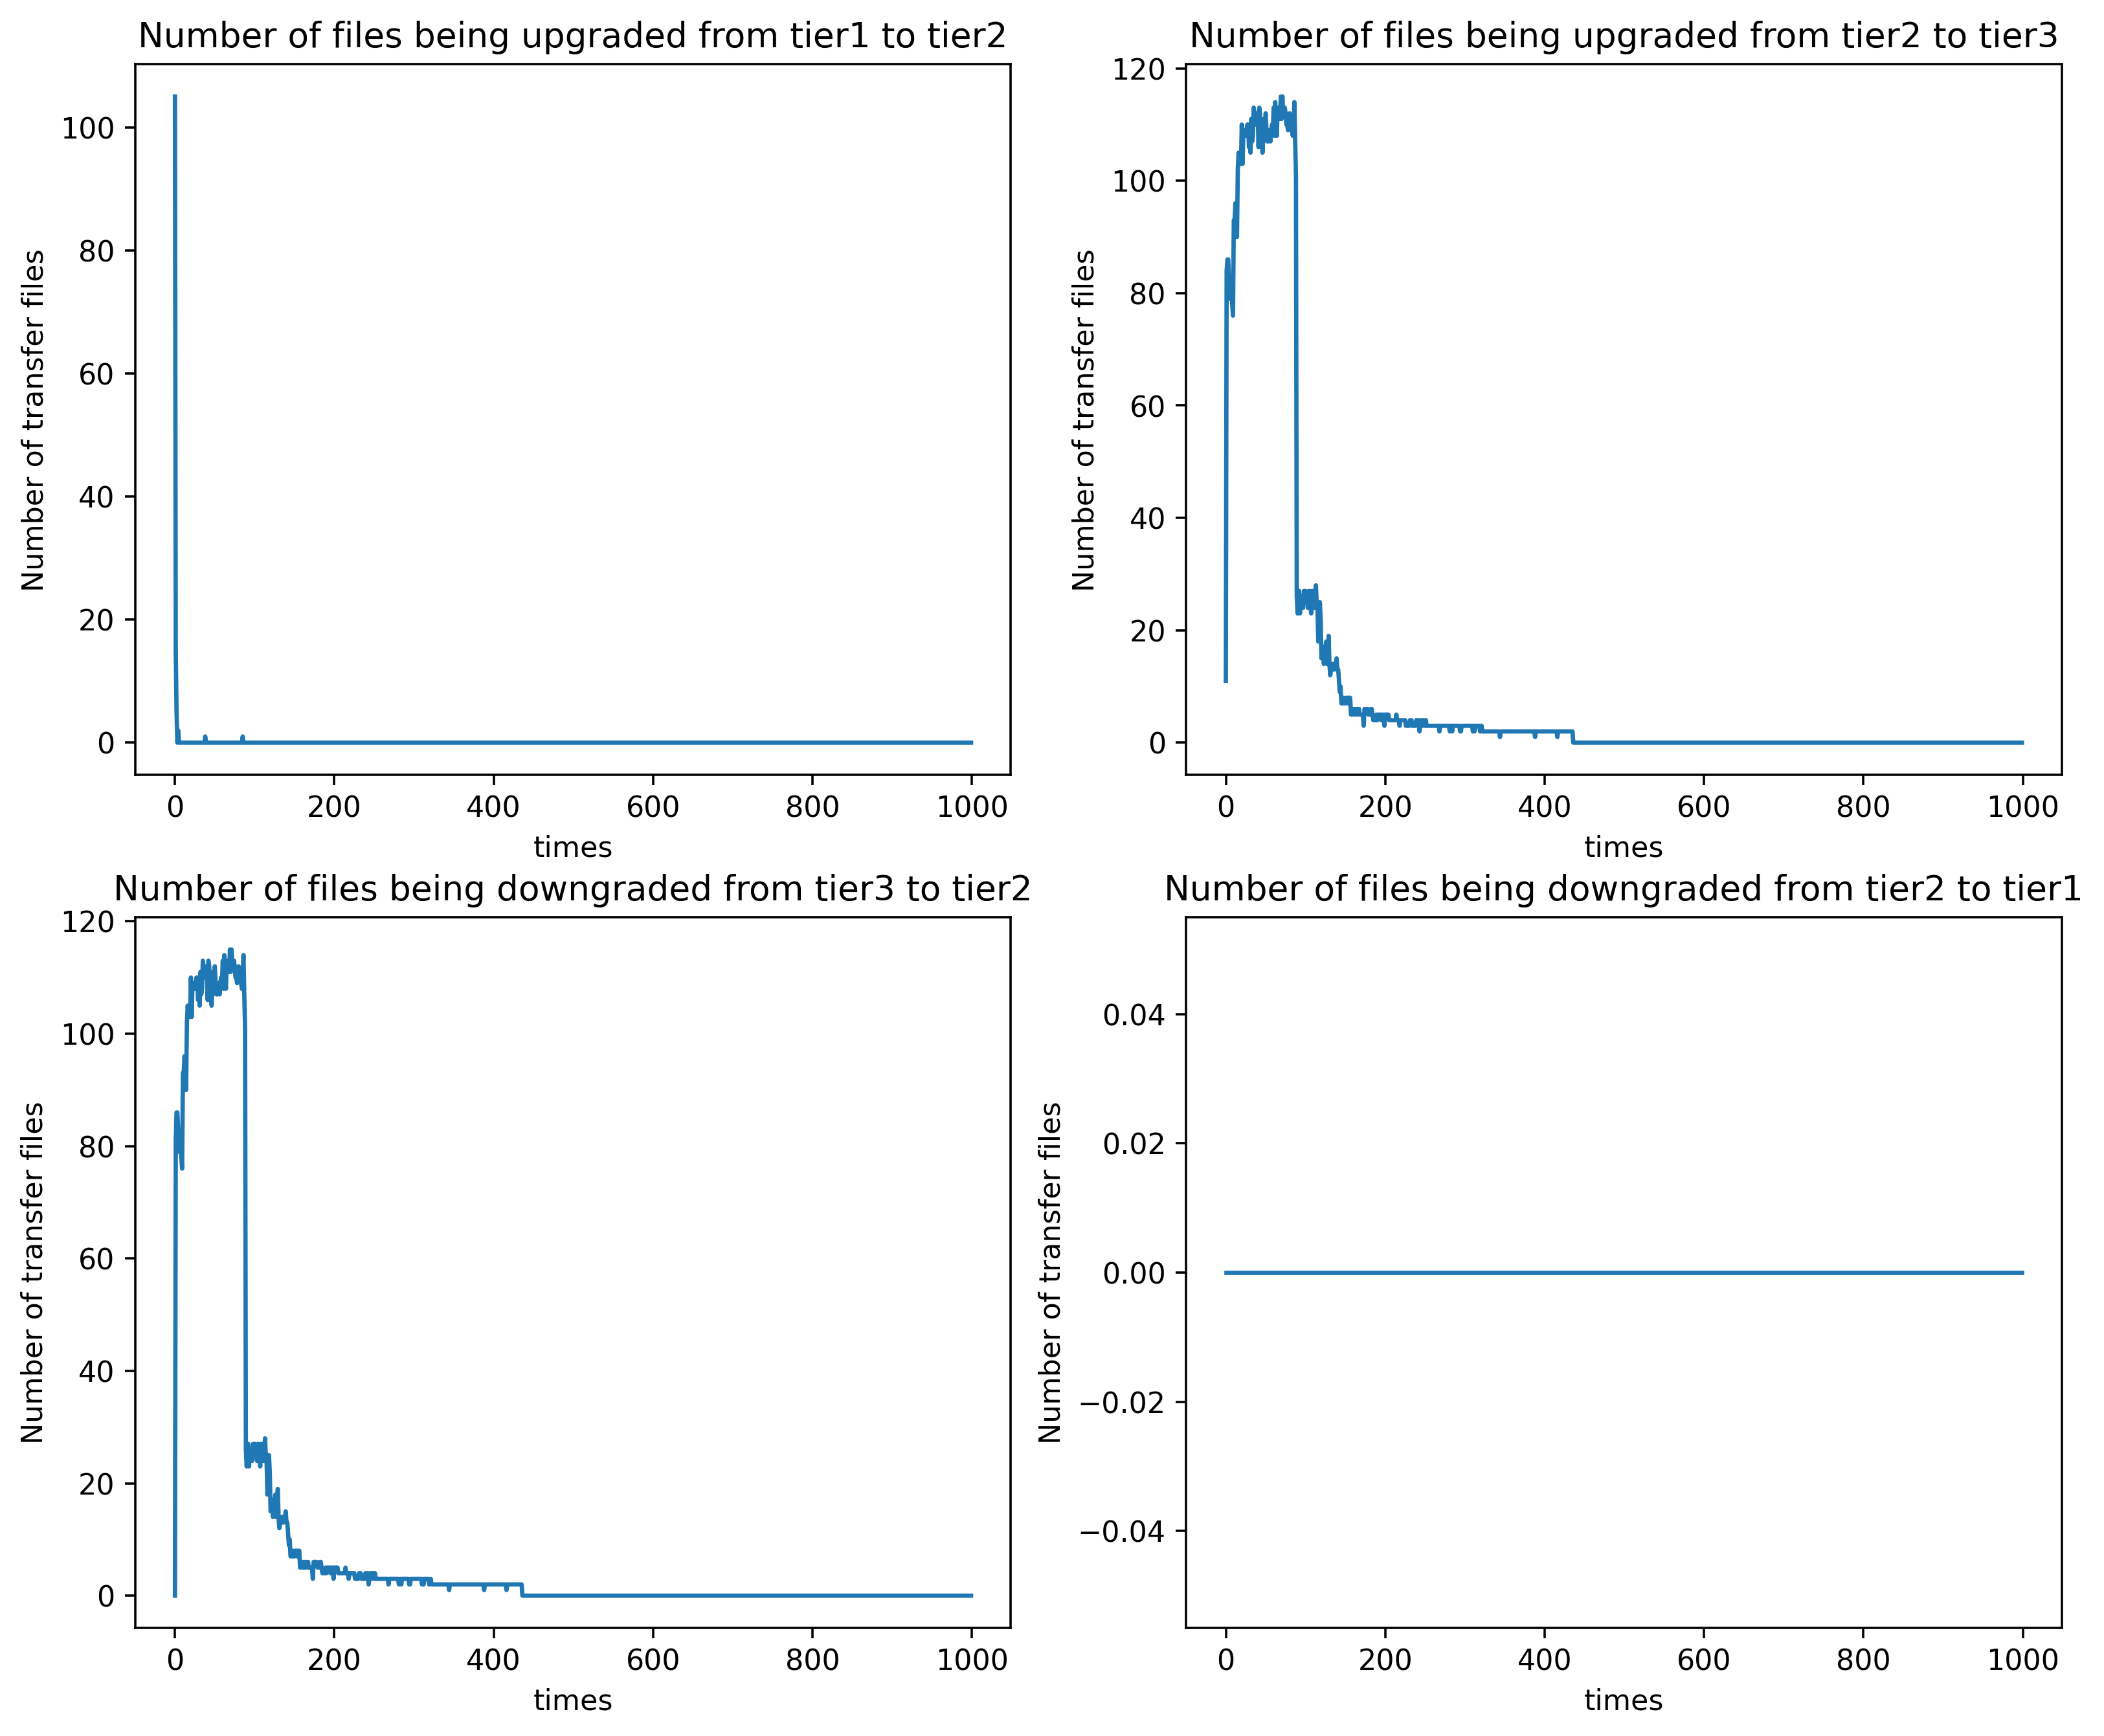

In [74]:
transfer_list_RL=np.load('./transfer_list_HASTE_HSMRL.npy')

plt.figure(1,figsize=(12,10), dpi=320)

plt.subplot(2,2,1)
plt.plot(np.array(transfer_list_RL)[:,0])
plt.xlabel('times')
plt.ylabel('Number of transfer files')
plt.title('Number of files being upgraded from tier1 to tier2')

plt.subplot(2,2,2)
plt.plot(np.array(transfer_list_RL)[:,2])
plt.xlabel('times')
plt.ylabel('Number of transfer files')
plt.title('Number of files being upgraded from tier2 to tier3')

plt.subplot(2,2,3)
plt.plot(np.array(transfer_list_RL)[:,4])
plt.xlabel('times')
plt.ylabel('Number of transfer files')
plt.title('Number of files being downgraded from tier3 to tier2')

plt.subplot(2,2,4)
plt.plot(np.array(transfer_list_RL)[:,6])
plt.xlabel('times')
plt.ylabel('Number of transfer files')
plt.title('Number of files being downgraded from tier2 to tier1')

#plt.savefig('./transfer_list_3tier_1000/Num_transfer_RL&rule123_1000.png',format='png',dpi=320)
plt.show()

# Tier content

In [5]:
Tier_list=np.load('Tier_list_RL_HASTE_HSMRL.npy',allow_pickle=True)

In [266]:
tier1=pd.DataFrame(Tier_list[999][0],columns=('No.', 'intr', 'req_time', 'time_untouched', 'weight', 'size','temp','time_touched'))
tier2=pd.DataFrame(Tier_list[999][1],columns=('No.', 'intr', 'req_time', 'time_untouched', 'weight', 'size', 'temp','time_touched'))
tier3=pd.DataFrame(Tier_list[999][2],columns=('No.', 'intr', 'req_time', 'time_untouched', 'weight', 'size', 'temp','time_touched'))
all_tier=pd.concat([tier1,tier2,tier3],ignore_index=True)
all_tier

,No.,intr,req_time,time_untouched,weight,size,temp,time_touched
0,223.0,0.008696,0.0,1000.0,2.0,4110.0,0.100000,0.0
1,486.0,0.869565,864.0,0.0,101.0,4110.0,0.999912,0.0
2,616.0,0.773913,862.0,0.0,90.0,4110.0,0.999910,0.0
3,366.0,0.017391,0.0,1000.0,3.0,4110.0,0.100000,0.0
4,424.0,0.773913,858.0,0.0,90.0,4110.0,0.999906,0.0
...,...,...,...,...,...,...,...,...
1051,1007.0,0.982609,878.0,0.0,114.0,4110.0,0.999923,0.0
1052,313.0,0.982609,880.0,0.0,114.0,4110.0,0.999925,0.0
1053,18.0,0.852174,878.0,0.0,99.0,4110.0,0.999923,0.0
1054,217.0,0.982609,875.0,1.0,114.0,4110.0,0.999921,0.0


# Running time

In [6]:
run_time=[]
for turn in range(1000):
    tier1=pd.DataFrame(Tier_list[turn][0],columns=('No.', 'intr', 'req_time', 'time_untouched', 'weight', 'size','temp','time_touched'))
    tier2=pd.DataFrame(Tier_list[turn][1],columns=('No.', 'intr', 'req_time', 'time_untouched', 'weight', 'size', 'temp','time_touched'))
    tier3=pd.DataFrame(Tier_list[turn][2],columns=('No.', 'intr', 'req_time', 'time_untouched', 'weight', 'size', 'temp','time_touched'))
    Request=pd.read_csv('./Requests_intr90/req_%d.csv'%turn)
    no_list=Request.loc[Request['request']==1,'No.']
    run=0
    for no in no_list:
        if no in tier1['No.']:
            run+=50
        elif no in tier2['No.']:
            run+=20
        elif no in tier3['No.']:
            run+=10
    run_time.append(run)

In [7]:
run_time

[14600,
 14400,
 14550,
 14700,
 13500,
 13100,
 12550,
 12150,
 12000,
 12300,
 12100,
 12000,
 12150,
 12250,
 12000,
 12100,
 12150,
 12550,
 12100,
 12250,
 12350,
 12250,
 11950,
 12150,
 12300,
 12000,
 12200,
 12250,
 12050,
 12150,
 12100,
 12150,
 12500,
 12300,
 12250,
 12250,
 12350,
 11950,
 12050,
 12150,
 12250,
 12150,
 11950,
 12050,
 12250,
 12300,
 12350,
 12050,
 12050,
 12000,
 12200,
 12150,
 12200,
 12150,
 12000,
 12150,
 12200,
 12200,
 12150,
 12000,
 12200,
 12150,
 12400,
 12150,
 12200,
 11900,
 12200,
 12250,
 11950,
 11850,
 11850,
 12050,
 12150,
 12300,
 12150,
 12350,
 12250,
 12450,
 12100,
 12350,
 12050,
 12050,
 12250,
 12400,
 12050,
 12200,
 12200,
 12200,
 12150,
 12300,
 12150,
 12200,
 12250,
 12300,
 12000,
 12250,
 12000,
 12250,
 12050,
 12200,
 12050,
 12150,
 12100,
 12350,
 12050,
 12150,
 12150,
 12300,
 12350,
 12250,
 12200,
 12550,
 12200,
 12200,
 12000,
 12150,
 12500,
 12150,
 12350,
 12250,
 12650,
 12250,
 12250,
 12400,
 12350,


In [8]:
sum(run_time)/1000

12181.45

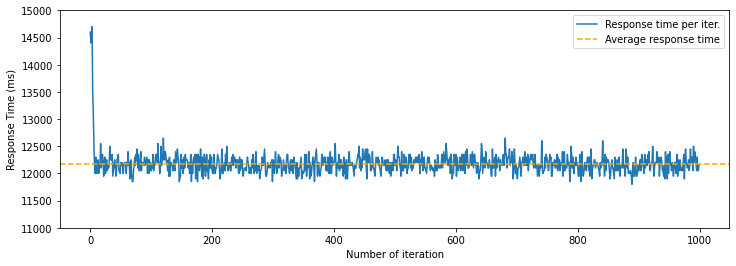

In [9]:
plt.figure(figsize=(12,4))
plt.plot([i for i in run_time])
plt.axhline(sum([i for i in run_time])/1000,linestyle='--',color='orange')
plt.ylabel('Response Time (ms)')
plt.xlabel('Number of iteration')
plt.ylim(11000,15000)
#plt.yticks([11000,7750,sum(run_time)/1000,8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'])
plt.show()

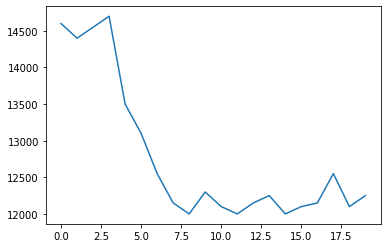

In [276]:
plt.plot(run_time[0:20])

# Min interestingness

In [10]:
all_tier=pd.concat([tier1,tier2,tier3],ignore_index=True)
all_tier

,No.,intr,req_time,time_untouched,weight,size,temp,time_touched
0,223.0,0.008696,0.0,1000.0,2.0,4110.0,0.100000,0.0
1,486.0,0.869565,864.0,0.0,101.0,4110.0,0.999912,0.0
2,616.0,0.773913,862.0,0.0,90.0,4110.0,0.999910,0.0
3,366.0,0.017391,0.0,1000.0,3.0,4110.0,0.100000,0.0
4,424.0,0.773913,858.0,0.0,90.0,4110.0,0.999906,0.0
...,...,...,...,...,...,...,...,...
1051,1007.0,0.982609,878.0,0.0,114.0,4110.0,0.999923,0.0
1052,313.0,0.982609,880.0,0.0,114.0,4110.0,0.999925,0.0
1053,18.0,0.852174,878.0,0.0,99.0,4110.0,0.999923,0.0
1054,217.0,0.982609,875.0,1.0,114.0,4110.0,0.999921,0.0


In [11]:
run_time_min=[]
tier3=all_tier.sort_values('intr', ascending=False)[0:24]
tier2=all_tier.sort_values('intr', ascending=False)[24:267]
tier1=all_tier.sort_values('intr', ascending=False)[267:]
for turn in range(1000):
    Request=pd.read_csv('./Requests_intr90/req_%d.csv'%turn)
    no_list=Request.loc[Request['request']==1,'No.']
    run=0
    for no in no_list:
        if no in tier1['No.']:
            run+=50
        elif no in tier2['No.']:
            run+=20
        elif no in tier3['No.']:
            run+=10
    run_time_min.append(run)

In [13]:
sum(run_time_min)/1000

13906.25

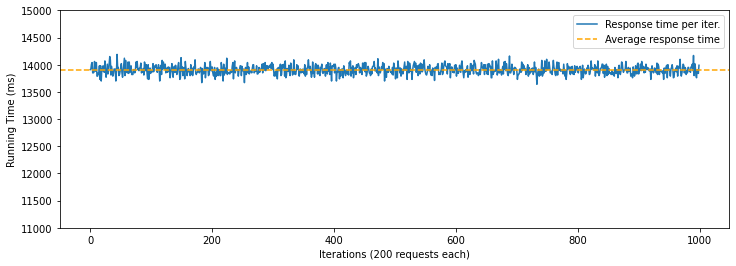

In [14]:
plt.figure(figsize=(12,4))
plt.plot([i for i in run_time_min])
plt.axhline(sum([i for i in run_time_min])/1000,linestyle='--',color='orange')
plt.ylabel('Running Time (ms)')
plt.xlabel('Iterations (200 requests each)')
plt.ylim(11000,15000)
#plt.yticks([11000,7750,sum(run_time)/1000,8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'])
plt.show()

# Random Shuffle 

In [19]:
run_time_rd1=[]
#all_tier=pd.concat([tier1,tier2,tier3],ignore_index=True)
all_tier=all_tier.sample(frac=1)
tier3=all_tier[0:24]
tier2=all_tier[24:267]
tier1=all_tier[267:]
for turn in range(1000):
    Request=pd.read_csv('./Requests_intr90/req_%d.csv'%turn)
    no_list=Request.loc[Request['request']==1,'No.']
    run=0
    for no in no_list:
        if no in tier1['No.']:
            run+=50
        elif no in tier2['No.']:
            run+=20
        elif no in tier3['No.']:
            run+=10
    run_time_rd1.append(run)

In [289]:

run_time_rd2=[]
all_tier=pd.concat([tier1,tier2,tier3],ignore_index=True)
all_tier=all_tier.sample(frac=1)
tier3=all_tier[0:len(tier3)]
tier2=all_tier[len(tier3):len(tier2)+len(tier3)]
tier1=all_tier[len(tier2)+len(tier3):]
for turn in range(1000):
    Request=pd.read_csv('./Requests_intr90/req_%d.csv'%turn)
    no_list=Request.loc[Request['request']==1,'No.']
    run=0
    for no in no_list:
        if no in tier1['No.']:
            run+=50
        elif no in tier2['No.']:
            run+=20
        elif no in tier3['No.']:
            run+=10
    run_time_rd2.append(run)

run_time_rd3=[]
all_tier=pd.concat([tier1,tier2,tier3],ignore_index=True)
all_tier=all_tier.sample(frac=1)
tier3=all_tier[0:len(tier3)]
tier2=all_tier[len(tier3):len(tier2)+len(tier3)]
tier1=all_tier[len(tier2)+len(tier3):]
for turn in range(1000):
    Request=pd.read_csv('./Requests_intr90/req_%d.csv'%turn)
    no_list=Request.loc[Request['request']==1,'No.']
    run=0
    for no in no_list:
        if no in tier1['No.']:
            run+=50
        elif no in tier2['No.']:
            run+=20
        elif no in tier3['No.']:
            run+=10
    run_time_rd3.append(run)

run_time_rd4=[]
all_tier=pd.concat([tier1,tier2,tier3],ignore_index=True)
all_tier=all_tier.sample(frac=1)
tier3=all_tier[0:len(tier3)]
tier2=all_tier[len(tier3):len(tier2)+len(tier3)]
tier1=all_tier[len(tier2)+len(tier3):]
for turn in range(1000):
    Request=pd.read_csv('./Requests_intr90/req_%d.csv'%turn)
    no_list=Request.loc[Request['request']==1,'No.']
    run=0
    for no in no_list:
        if no in tier1['No.']:
            run+=50
        elif no in tier2['No.']:
            run+=20
        elif no in tier3['No.']:
            run+=10
    run_time_rd4.append(run)


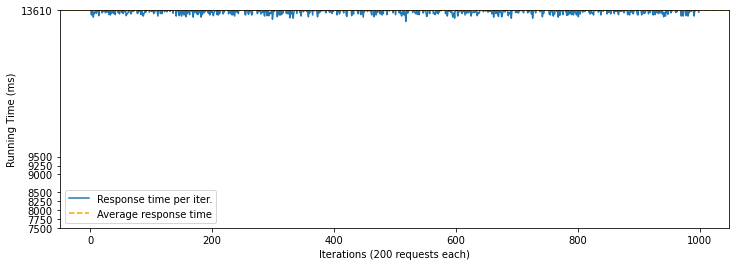

In [17]:
plt.figure(figsize=(12,4))
plt.plot([i for i in run_time_rd1])
plt.axhline(sum([i for i in run_time_rd1])/1000,linestyle='--',color='orange')
plt.ylabel('Running Time (ms)')
plt.xlabel('Iterations (200 requests each)')
plt.ylim(7500,9500)
plt.yticks([7500,7750,8000,8250,8500,sum(run_time_rd1)/1000,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'])
plt.show()

# LRU/LFU

In [23]:
run_time_lru=[]
tier3=all_tier[0:10]
tier2=all_tier[10:100]
tier1=all_tier[100:]
for turn in range(1000):
    req=pd.read_csv('./Requests_intr90/req_%d.csv'%turn)
    req_1=req.loc[req['request']==1]
    ti=0
    for no in req_1['No.']:
        if no in list(tier1['No.']):
            ti+=50
        elif no in list(tier2['No.']):
            ti+=20
        elif no in list(tier3['No.']):
            ti+=10
        else:
            print('Error: no such file in tier3/2/1')
    run_time_lru.append(ti)
    tier=pd.concat([all_tier.loc[all_tier['No.'].isin(req_1['No.'])],all_tier.loc[~all_tier['No.'].isin(req_1['No.'])]],ignore_index=True)
    tier3=tier[0:24]
    tier2=tier[24:267]
    tier1=tier[267:]

In [25]:
run_time_lfu=[]
all_tier_f=all_tier
all_tier_f['freq']=0
tier3=all_tier_f[0:10]
tier2=all_tier_f[10:100]
tier1=all_tier_f[100:]
for turn in range(1000):
    req=pd.read_csv('./Requests_intr90/req_%d.csv'%turn)
    req_1=req.loc[req['request']==1]
    all_tier_f.loc[all_tier_f['No.'].isin(req_1['No.']),'freq']+=1
    ti=0
    for no in req_1['No.']:
        if no in list(tier1['No.']):
            ti+=50
        elif no in list(tier2['No.']):
            ti+=20
        elif no in list(tier3['No.']):
            ti+=10
        else:
            print('Error: no such file in tier3/2/1')
    run_time_lfu.append(ti)
    tier3=all_tier_f.sort_values(by='freq',ascending=False)[0:24]
    tier2=all_tier_f.sort_values(by='freq',ascending=False)[24:267]
    tier1=all_tier_f.sort_values(by='freq',ascending=False)[267:]

# Kmeans

In [ ]:
from sklearn.cluster import KMeans
run_time_kmeans=[]
all_tier_f=all_tier
all_tier_f['freq']=0
tier3=all_tier_f[0:10]
tier2=all_tier_f[10:100]
tier1=all_tier_f[100:]
for turn in range(1000):
    req=pd.read_csv('./Requests_intr90/req_%d.csv'%turn)
    req_1=req.loc[req['request']==1]
    all_tier_f.loc[all_tier_f['No.'].isin(req_1['No.']),'freq']+=1
    ti=0
    for no in req_1['No.']:
        if no in list(tier1['No.']):
            ti+=50
        elif no in list(tier2['No.']):
            ti+=20
        elif no in list(tier3['No.']):
            ti+=10
        else:
            print('Error: no such file in tier3/2/1')
    run_time_kmeans.append(ti)
    all_tier_f['label']=KMeans(n_clusters=50, random_state=0, n_init=10).fit(all_tier_f[['freq','intr']]).labels_    
    tier=all_tier_f.sort_values(by=['intr','label'],ascending=False)
    tier3=tier[0:24]
    tier2=tier[24:267]
    tier1=tier[267:]

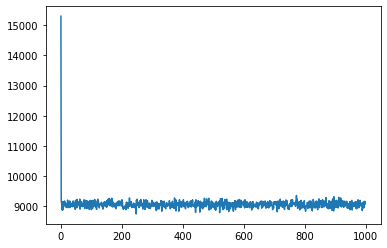

In [48]:
plt.plot(run_time_kmeans)

# Time/Request

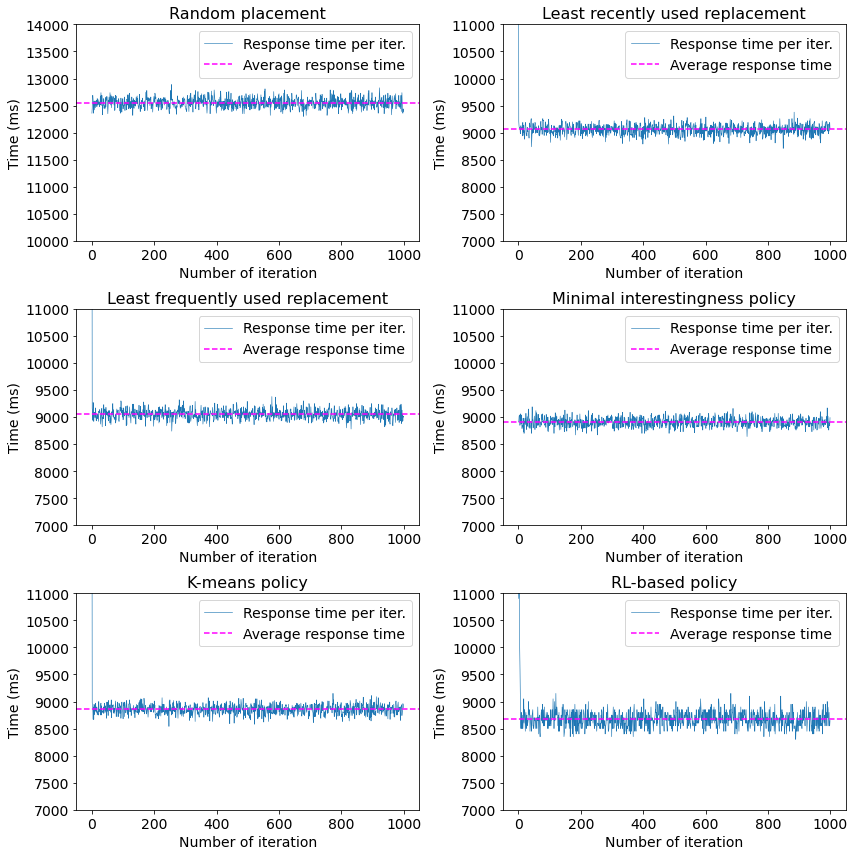

In [53]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,6)
plt.plot([i for i in run_time],linewidth=0.6)
plt.axhline(sum([i for i in run_time])/1000,linestyle='--',color='magenta')
plt.ylabel('Time (ms)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(7000,11000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([7000,7750,sum(run_time)/1000,8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],fontsize=14)
plt.title('RL-based policy',fontsize=16)

plt.subplot(3,2,5)
plt.plot([i for i in run_time_kmeans],linewidth=0.6)
plt.axhline(sum([i for i in run_time_kmeans])/1000,linestyle='--',color='magenta')
plt.ylabel('Time (ms)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(7000,11000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([7000,7750,sum(run_time)/1000,8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],fontsize=14)
plt.title('K-means policy',fontsize=16)

plt.subplot(3,2,1)
plt.plot([i for i in run_time_rd1],linewidth=0.6)
plt.axhline(sum([i for i in run_time_rd1])/1000,linestyle='--',color='magenta')
plt.ylabel('Time (ms)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(10000,14000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([7000,7750,sum(run_time)/1000,8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],loc='upper right',fontsize=14)
plt.title('Random placement',fontsize=16)

plt.subplot(3,2,2)
plt.plot([i for i in run_time_lru],linewidth=0.6)
plt.axhline(sum([i for i in run_time_lru])/1000,linestyle='--',color='magenta')
plt.ylabel('Time (ms)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(7000,11000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([7000,7750,sum(run_time)/1000,8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],fontsize=14)
plt.title('Least recently used replacement',fontsize=16)

plt.subplot(3,2,3)
plt.plot([i for i in run_time_lfu],linewidth=0.6)
plt.axhline(sum([i for i in run_time_lfu])/1000,linestyle='--',color='magenta')
plt.ylabel('Time (ms)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(7000,11000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([7000,7750,sum(run_time)/1000,8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],loc='upper right',fontsize=14)
plt.title('Least frequently used replacement',fontsize=16)

plt.subplot(3,2,4)
plt.plot([i for i in run_time_min],linewidth=0.6)
plt.axhline(sum([i for i in run_time_min])/1000,linestyle='--',color='magenta')
plt.ylabel('Time (ms)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(7000,11000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([7000,7750,sum(run_time)/1000,8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],fontsize=14)
plt.title('Minimal interestingness policy',fontsize=16)

plt.tight_layout()
plt.savefig('./Running_time_BBBC_RL-Rand-Minints-1.png',format='png',dpi=320, bbox_inches='tight')
plt.show()

In [60]:
[sum([i for i in run_time])/1000,
sum([i for i in run_time_kmeans])/1000,
sum([i for i in run_time_rd1])/1000,
sum([i for i in run_time_lru])/1000,
sum([i for i in run_time_lfu])/1000,
sum([i for i in run_time_min])/1000]

[8681.45, 8810.25, 12554.24, 9063.15, 9061.28, 8906.25]